# Week 2: Exercises

In this tutorial file, you will learn 
- Extracting basic information about distribution of variables
- Handling categorical variables
- Handling outliers
- Data standardization

In [3]:
import pandas as pd
import numpy as np

Let's import and explore the data file "hc_train.csv":

In [5]:
hc = pd.read_csv('hc_train.csv')

## Summarize with .info()
hc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51238 entries, 0 to 51237
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         51238 non-null  int64  
 1   case_id                            51238 non-null  int64  
 2   Hospital_code                      51238 non-null  int64  
 3   Hospital_type_code                 51238 non-null  object 
 4   City_Code_Hospital                 51238 non-null  int64  
 5   Hospital_region_code               51238 non-null  object 
 6   Available Extra Rooms in Hospital  51238 non-null  int64  
 7   Department                         51238 non-null  object 
 8   Ward_Type                          51238 non-null  object 
 9   Ward_Facility_Code                 51238 non-null  object 
 10  Bed Grade                          51214 non-null  float64
 11  patientid                          51238 non-null  int

In [7]:
## Shape?
hc.shape

(51238, 19)

In [8]:
## Count NAs for each column
hc.isna().sum()

Unnamed: 0                             0
case_id                                0
Hospital_code                          0
Hospital_type_code                     0
City_Code_Hospital                     0
Hospital_region_code                   0
Available Extra Rooms in Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed Grade                             24
patientid                              0
City_Code_Patient                    750
Type of Admission                      0
Severity of Illness                    0
Visitors with Patient                  0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

## A Closer Look into Data

Before starting our analysis, it is important to know the data columns and the actual content. We can print the first 5 rows with `.head()` method:

In [9]:
hc.head()

,Unnamed: 0,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,119967,119968,27,a,7,Y,3,gynecology,R,C,2.0,11389,8.0,Emergency,Minor,2,11-20,5072.0,21-30
1,92433,92434,6,a,6,X,4,gynecology,Q,F,1.0,12522,2.0,Emergency,Extreme,4,31-40,3585.0,21-30
2,132258,132259,16,c,3,Z,4,gynecology,S,A,3.0,119556,8.0,Trauma,Moderate,6,71-80,4013.0,More than 100 Days
3,168439,168440,23,a,6,X,2,anesthesia,S,F,3.0,107177,8.0,Urgent,Extreme,2,71-80,5160.0,21-30
4,82100,82101,25,e,1,X,3,gynecology,R,E,3.0,64508,13.0,Trauma,Moderate,3,61-70,4099.0,21-30


In [10]:
## check how many hospitals is there in the data with .unique()
hc['Hospital_code'].unique()

array([27,  6, 16, 23, 25, 14,  7, 19, 30, 26,  2, 29, 11, 28, 15,  3, 17,
       10, 22, 13, 31, 12, 21, 32,  9,  1,  8, 24,  5,  4, 18, 20],
      dtype=int64)

In [12]:
## How many regions?
hc['Hospital_region_code'].unique()

array(['Y', 'X', 'Z'], dtype=object)

There are 32 hospitals in 3 different regions in the data set.

In [14]:
# count values in Department column
hc['Department'].value_counts()

gynecology            40051
anesthesia             4858
radiotherapy           4589
TB & Chest disease     1554
surgery                 186
Name: Department, dtype: int64

Most patients are treated in the gynecology department, and 186 patients went under surgery.

In [15]:
hc['Age'].value_counts()

31-40     10300
41-50     10067
51-60      7861
21-30      6664
71-80      5730
61-70      5357
11-20      2783
81-90      1269
0-10        993
91-100      214
Name: Age, dtype: int64

Majority of the patients are adults in their 30s and 40s, and roughly around 1500 whose age is >80.

In [16]:
# count values
hc['Type of Admission'].value_counts()

Trauma       24614
Emergency    18889
Urgent        7735
Name: Type of Admission, dtype: int64

Half of the patients have trauma related issues. There are 7735 urgent issues recorded.

In [ ]:
# count values
hc['Severity of Illness']

Severity was mostly moderate.

When a categorical column has too many values, it is difficult to tell the distribution using `value_counts()`. Instead, histograms provide effective visualization. Pandas has a method built in to easily generate histograms.

<Axes: >

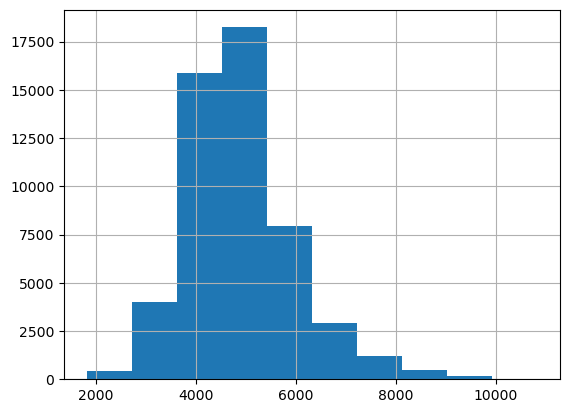

In [17]:
# Plot the histogram
hc['Admission_Deposit'].hist()

The amount of admission paid ranges between 2000 and 10000 with the median around 5000.

---

## Convert Type to Categorical

Categorical variables are coded as `object` if it is not specified.

In [18]:
hc.dtypes

Unnamed: 0                             int64
case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

You may choose to convert it to `category`. For example, let's convert the __Type of Admission__ column and see how many observations are in each category:

In [19]:
hc['Type of Admission'].value_counts() 

Trauma       24614
Emergency    18889
Urgent        7735
Name: Type of Admission, dtype: int64

In [21]:
# use astype(...) to convert to 'category'
hc['Type of Admission'] = hc['Type of Admission'].astype('category')
hc['Type of Admission']

0        Emergency
1        Emergency
2           Trauma
3           Urgent
4           Trauma
           ...    
51233       Trauma
51234    Emergency
51235    Emergency
51236       Trauma
51237       Trauma
Name: Type of Admission, Length: 51238, dtype: category
Categories (3, object): ['Emergency', 'Trauma', 'Urgent']

Now, let's convert it to categorical:

>__Task 1__
>
>- Identify the categories in the __Hospital_type_code__ column and determine how many are in each category

In [22]:
hc['Type of Admission'].value_counts()

Trauma       24614
Emergency    18889
Urgent        7735
Name: Type of Admission, dtype: int64

---

## Nominal Data Mapping

### Label Encoding

we use `LabelEncoder` from the scikit-learn library to assign a distinct integer to each category. For example, we can map the __Type of Admission__ column to numeric values:

In [23]:
hc['Type of Admission'].head()

0    Emergency
1    Emergency
2       Trauma
3       Urgent
4       Trauma
Name: Type of Admission, dtype: category
Categories (3, object): ['Emergency', 'Trauma', 'Urgent']

In [26]:
from sklearn.preprocessing import LabelEncoder

# Initiate the encoder
enc = LabelEncoder()

# Apply enc.fit_transform method
enc.fit_transform(hc['Type of Admission']) [0:10]

array([0, 0, 1, 2, 1, 2, 1, 1, 0, 0])

To convert the numbers back to string categories, we use the `inverse_transform()` method:

In [27]:
# Create a result vector that our ML analysis could yield
result = np.array([1,1,0,2,0,1])

# Transform back
enc.inverse_transform(result)

array(['Trauma', 'Trauma', 'Emergency', 'Urgent', 'Emergency', 'Trauma'],
      dtype=object)

>__Task 2__
>
>- Encode the __Department__ to numbers using `LabelEncoder`
>- Print the status corresponding to the label array `np.array([0,1,1,4,3,2])`, using `inverse_transform`

In [29]:
from sklearn.preprocessing import LabelEncoder
# Initiate the encoder
enc = LabelEncoder()

# Apply enc.fit_transform method
enc.fit_transform(hc['Department']) [0:10]

# Create a result vector that our ML analysis could yield
result = np.array([0,1,1,4,3,2])

# Transform back
enc.inverse_transform(result)

array(['TB & Chest disease', 'anesthesia', 'anesthesia', 'surgery',
       'radiotherapy', 'gynecology'], dtype=object)

There was a lil spiel about memory, and how to make a copy instead of pointing to the same spot in the existing memory

### One-Hot Encoding

`OneHotEncoder` works similarly as `LabelEncoder` with subtle differences about how to initiate and transform. Instead of `pd.Series` object, __it takes `pd.DataFrame` as input__. So, you need to pass `df[['varName']]`.

>__Task 3__
>
>Convert the __Type of Admission__ column to one-hot vectors using `OneHotEncoder`

In [30]:
hc[['Type of Admission']].head()

,Type of Admission
0,Emergency
1,Emergency
2,Trauma
3,Urgent
4,Trauma


In [33]:
from sklearn.preprocessing import OneHotEncoder

# Initiate the encoder (use handle_unknown="ignore" as option)
enc = OneHotEncoder(handle_unknown='ignore')

# fit_transform
enc.fit_transform(hc[['Type of Admission']])

#homie is very big, doesn't show

<51238x3 sparse matrix of type '<class 'numpy.float64'>'
	with 51238 stored elements in Compressed Sparse Row format>

In [ ]:
enc.fit_transform(hc[['Type of Admission']]).toarray()

Similarly, we can also use the `inverse_transform()` method to revert the data.

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

>__Task 4__
>
>Decode the below vector back to categories using `inverse_transform`
>
>`np.array([[0,1,0], [0,1,0], [0,0,1], [1,0,0], [0,0,1]])`

In [35]:
# Create a result vector that our ML analysis could yield
result = np.array([[0,1,0],
                   [0,1,0],
                   [0,0,1],
                   [1,0,0],
                   [0,0,1]])

# Transform back
enc.inverse_transform(result)

array([['Trauma'],
       ['Trauma'],
       ['Urgent'],
       ['Emergency'],
       ['Urgent']], dtype=object)

### Dummy Variables

Alternatively, we can use Pandas `get_dummies` to convert categorical variables to one-hot vectors.

>__Task 5__
>
>Convert the __Department__ column to one-hot vectors using `get_dummies`

In [ ]:
from pandas import get_dummies

...

---

## Ordinal Data Mapping

>__Task 6__
>
>Use a dictionary to convert ordinal variables to numbers in the __Severity of Illness__ column
>
>- Create a dictionary that maps "Extreme" to 2, "Moderate" to 1 and "Minor" to 0
>- Map the categories to numeric labels using `replace(dict)`

In [27]:
hc['Severity of Illness'].unique()

array(['Minor', 'Extreme', 'Moderate'], dtype=object)

In [28]:
mapDict = {'Extreme': 2,
           'Moderate': 1,
           'Minor': 0}

In [ ]:
# use replace to map
hc['Severity of Illness_numeric'] = ...
hc['Severity of Illness_numeric']

Now, let's assume we want to construct the original data back from the numeric variables.

>__Task 7__
>
>- Reverse the map dictionary using a `for` loop
>- Apply the same procedure using this reverse map

In [30]:
# Reversed map dictionary
mapDict_inv = {... for ... in ...}

In [ ]:
hc['Severity of Illness_numeric']...

An alternative is to use the `map()` method:

---

## Convert Numeric to Categorical

Sometimes, we have numeric variables that would be more meaningful if they were put into categories using some thresholds. For example, the __Admission_Deposit__ column is a continuous numeric variable for the amount paid to the hospital.

In [ ]:
hc['Admission_Deposit'].hist()

We will now create three categories:
- 0 to 3000: low, 
- 3001 to 7000: moderate
- 7001 and above (maximum value) : expensive

To this end, we will 

1. Create a list of the thresholds or `buckets`
    - Find the maximum value using `max()`
2. Convert to a categorical variable using `pd.cut()`
2. Convert the categorical variable to one-hot vectors using `pd.get_dummies()`

In [ ]:
maxVal  = ...
buckets = [0,3000,7000,maxVal]

hc['Admission_Deposit_categ'] = ...
hc['Admission_Deposit_categ']

In [36]:
# use get_dummies()
...

,"(0.0, 3000.0]","(3000.0, 7000.0]","(7000.0, 10842.0]"
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
51233,0,1,0
51234,0,1,0
51235,0,1,0
51236,0,1,0


# Handling Outliers

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Let's import and explore the data file "healthcare_m5.csv":

In [ ]:
hc_df = pd.read_csv('healthcare.csv')
hc_df.head()

## Outliers

In pandas, we can locate the outliers as below:

`x = df['colName']`

`mean = x.mean()`

`sd = x.std()`

`outliers = (x < mean-3*sd) | (x > mean+3*sd)`

Once we located the outliers, we can filter the data as:

`pd[outliers]`

Let's first check the mean, standard deviation, min, and max of the __Admission_Deposit__ column. Notice that the max is quite beyond the 75% percentile.

In [ ]:
hc_df['Admission_Deposit'].describe()

>__Task 1__
>
>Filter the data to display the rows where values are outliers (3 standard deviations larger than the mean) in the __Admission_Deposit__ column
>
>- Find the the upper bound, mean, and lower bound of the column
>- Create a mask for values less than `mean-3*sd` and greater than `mean+3*sd`. What are the lower and upper bounds here?
>- Use the mask to filter the rows. How many outliers do you find using this rule?

In [4]:
# Find the upper bound, mean, and lower bound
admission_series = hc_df['Admission_Deposit']
mean = ...
sd   = ...

print(..., ..., ...)

1500.5503032542756 4889.439361411452 8278.328419568628


In [ ]:
# Create a mask and filter the rows
outliers = ...
print(...)
hc_df[outliers]

Note that the data set has many outliers that have a high admission deposit. Check the distribution using a histogram. Do you think `mean+/-3*sd` are good thresholds here?

In [ ]:
hc_df['Admission_Deposit'].hist(bins = 100)

>__Task 2__
>
>Suppose the admission deposit is capped by 20,000. Replace outliers in this case with the cap 20,000.

In [ ]:
outliers = (hc_df['Admission_Deposit'] ...)
hc_df['Admission_Deposit'][outliers]= ...
hc_df['Admission_Deposit'].describe()

---

## Partitioning

>__Task 3__
>
>Split the data set into 70% training and 30% test sets with row shuffling
>
>- Your code must split the output and input:
>    - Output is the __Stay Code__ column, which coded how long the patient stays in the hospital
>    - Input columns are numerical columns: __Hospital_code__, __Available Extra Rooms in Hospital__, __Bed Grade__, __Admission_Deposit__, __Type of Admission Code__, __Age Code__, __Severity of Illness Code__
>- Use `random_state=101` for future replication purpose
>- Your code must produce 4 subsets:
>    - `X_train` and `X_test` must have 7 columns
>    - `y_train` and `y_test` must have 1 column

In [8]:
from sklearn.model_selection import train_test_split

input_col = ['Hospital_code', 'Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Type of Admission Code', 'Age Code', 'Severity of Illness Code']
X_train, X_test, y_train, y_test = train_test_split(hc_df['Stay Code'], hc_df[input_col], test_size=0.3, shuffle=True, random_state=101)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35866,)
(15372,)
(35866, 7)
(15372, 7)


---

## Feature Scaling

### MinMax Normalization

>__Task 4__
>
>Apply `MinMaxScaler` to the data set
>
>- Initiate a `MinMaxScaler` object
>- Apply the scaler to fit all these columns: __Hospital_code__, __Available Extra Rooms in Hospital__, __Bed Grade__, __Admission_Deposit__, __Type of Admission Code__, __Age Code__, __Severity of Illness Code__, __Stay Code__
>- Repeat the same to scale the data between -1 and 1

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
cols_scale = ['Hospital_code', 'Available Extra Rooms in Hospital', 'Bed Grade', 'Admission_Deposit', 'Type of Admission Code', 'Age Code', 'Severity of Illness Code','Stay Code']
hc_scaled = minmax_scaler.fit_transform(hc_df[cols_scale])

print(hc_scaled)

[[0.83870968 0.21428571 0.33333333 ... 0.11111111 0.5        0.2       ]
 [0.16129032 0.28571429 0.         ... 0.33333333 0.         0.2       ]
 [0.48387097 0.28571429 0.66666667 ... 0.77777778 1.         1.        ]
 ...
 [0.25806452 0.21428571 0.66666667 ... 0.55555556 1.         1.        ]
 [0.70967742 0.28571429 1.         ... 0.22222222 0.5        0.2       ]
 [0.03225806 0.14285714 0.33333333 ... 0.55555556 0.         0.3       ]]


In [10]:
# Scale the data between -1 and 1
minmax_scaler = MinMaxScaler((-1,1))

hc_scaled = minmax_scaler.fit_transform(hc_df[cols_scale])

print(hc_scaled)

[[ 0.67741935 -0.57142857 -0.33333333 ... -0.77777778  0.
  -0.6       ]
 [-0.67741935 -0.42857143 -1.         ... -0.33333333 -1.
  -0.6       ]
 [-0.03225806 -0.42857143  0.33333333 ...  0.55555556  1.
   1.        ]
 ...
 [-0.48387097 -0.57142857  0.33333333 ...  0.11111111  1.
   1.        ]
 [ 0.41935484 -0.42857143  1.         ... -0.55555556  0.
  -0.6       ]
 [-0.93548387 -0.71428571 -0.33333333 ...  0.11111111 -1.
  -0.4       ]]


What is the problem with the above scaling process? Applying a scaler to categorical coded variables may not be needed, depending on the encoding method and machine learning model. Moreover, the outcome variable is the target to predict and should not be scaled. Let's complete the next task.

>__Task 5__
>
>Apply `MinMaxScaler` to specific columns
>
>- Initiate a `MinMaxScaler` object
>- Split the data into input and output:
>    - Input is __Admission_Deposit__ and __Available Extra Rooms in Hospital__
>    - Output is __Stay Code__
>- Apply the scaler to only input columns and scale between 0 and 1

In [11]:
minmax_scaler = MinMaxScaler()
cols_scale = ['Available Extra Rooms in Hospital','Admission_Deposit']
X, y = hc_df[cols_scale], hc_df['Stay Code']
X_scaled = minmax_scaler.fit_transform(X)
print(X_scaled)

[[0.21428571 0.17928418]
 [0.28571429 0.09753148]
 [0.28571429 0.12106218]
 ...
 [0.21428571 0.10258948]
 [0.28571429 0.14618726]
 [0.14285714 0.12765957]]


### Standardization

>__Task 6__
>
>Apply `StandardScaler` to the data set
>
>- Initiate a `StandardScaler` object
>- Split the data into input and output:
>    - Input is __Admission_Deposit__ and __Available Extra Rooms in Hospital__
>    - Output is __Stay Code__
>- Apply the scaler to only input columns

In [12]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
cols_scale = ['Available Extra Rooms in Hospital','Admission_Deposit']
X, y = hc_df[cols_scale], hc_df['Stay Code']
X_scaled = standard_scaler.fit_transform(X)

print(X_scaled)

[[-0.17039245  0.16506863]
 [ 0.68689037 -1.17146885]
 [ 0.68689037 -0.78677616]
 ...
 [-0.17039245 -1.0887779 ]
 [ 0.68689037 -0.37601783]
 [-1.02767527 -0.67891839]]


In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's import and explore the data file "heart_failure.csv":

In [5]:
heart = pd.read_csv('heart_failure.csv')
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
